C:\Users\Sudip\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sudip\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sudip\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sudip\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

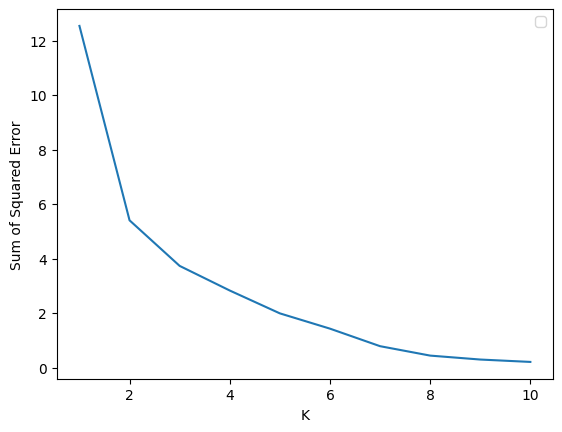

C:\Users\Sudip\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


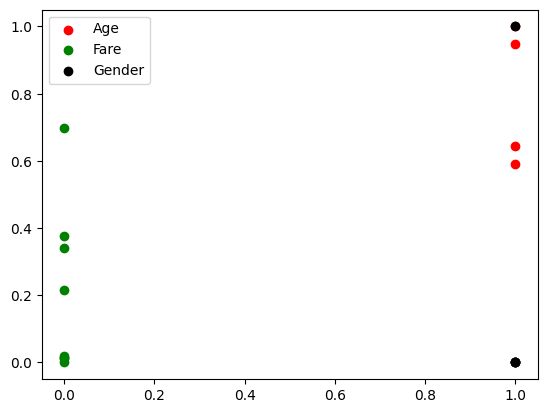

In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
df = pd.read_csv('Test_titanic.csv')
df = df.drop(["PassengerId","Pclass","Name","SibSp","Parch","Ticket","Cabin","Embarked"],axis=1)
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Sex"])
df = df.drop("Sex",axis=1)
mean1 = df.Age.mean()
df.Age.fillna(mean1,inplace=True)
# df.isnull().sum()
# Scaling 
# For StandardScaler
# ss = StandardScaler()
# ss.fit(df)
# df = ss.transform(df)

scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
scaler.fit(df[['Fare']])
df['Fare'] = scaler.transform(df[['Fare']])
# df.head()

sse = []
krng = range(1,11)

for i in krng:
    km = KMeans(n_clusters=i)
    km.fit(df)
    sse.append(km.inertia_)


plt.plot(krng,sse)
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.legend()
plt.show()

# Clustering
km = KMeans(n_clusters=4)
pre = km.fit_predict(df)

df['cluster'] = pre
df.head()
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2= df[df.cluster == 2]

plt.scatter(df0.Survived,df0.Age,label = "Age",color= 'red')
plt.scatter(df1.Survived,df1.Fare,label = "Fare",color= 'green')
plt.scatter(df2.Survived,df2.Gender,label = "Gender", color= 'black')
plt.legend()
plt.show()
# u_pre = np.unique(pre)
# for i in u_pre:
#     plt.scatter(df[pre==i,0],df[pre==i,1],label = i)
# plt.legend()
# plt.show()